In [3]:
# SPDX-FileCopyrightText: 2020 G2Elab / MAGE
#
# SPDX-License-Identifier: Apache-2.0

# if NoLoad is not installed 
!pip install noloadj --quiet


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<H1>NoLoad tutorial</H1>
Based on test functions: <A href="https://en.wikipedia.org/wiki/Test_functions_for_optimization" target="_blank">https://en.wikipedia.org/wiki/Test_functions_for_optimization</A>


<H2>Sensitivity Analysis</H2>

<H3>function definition</H3>

In [4]:
def rosenbrock(x,y):
    fobj=(1-x)*(1-x)+100*(y-x*x)**2
    ctr1=(x-1)**3-y+1
    ctr2=x+y-2
    return locals().items()

<H3>plot function</H3>

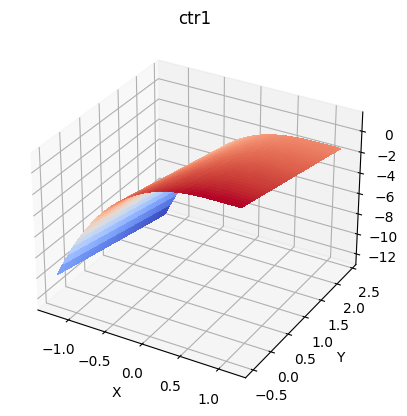

In [5]:
#Plot
from plotTools import plot3D
%matplotlib inline
plot3D(rosenbrock, [[-1.25,1.25],[-0.5,2.5]], outNames = ['fobj','ctr1','ctr2'])


<H3>Sensitivity Analysis using NoLoad</H3>

In [6]:
from noloadj.analyse.simulation import computeOnce
# Compute outputs
inputs = {'x': 1.0, 'y': 2.0}
outputs = ['fobj', 'ctr1', 'ctr2']
results = computeOnce(model=rosenbrock, inputs=inputs, outputs=outputs)
print(outputs, '=', results)

['fobj', 'ctr1', 'ctr2'] = [100.0, -1.0, 1.0]


               x    fobj    ctr1          ctr2
0  -1.500000e+00   12.50 -16.625 -1.500000e+00
1  -1.400000e+00    5.92 -14.824 -1.400000e+00
2  -1.300000e+00   14.90 -13.167 -1.300000e+00
3  -1.200000e+00   36.20 -11.648 -1.200000e+00
4  -1.100000e+00   66.82 -10.261 -1.100000e+00
5  -1.000000e+00  104.00  -9.000 -1.000000e+00
6  -9.000000e-01  145.22  -7.859 -9.000000e-01
7  -8.000000e-01  188.20  -6.832 -8.000000e-01
8  -7.000000e-01  230.90  -5.913 -7.000000e-01
9  -6.000000e-01  271.52  -5.096 -6.000000e-01
10 -5.000000e-01  308.50  -4.375 -5.000000e-01
11 -4.000000e-01  340.52  -3.744 -4.000000e-01
12 -3.000000e-01  366.50  -3.197 -3.000000e-01
13 -2.000000e-01  385.60  -2.728 -2.000000e-01
14 -1.000000e-01  397.22  -2.331 -1.000000e-01
15  1.332268e-15  401.00  -2.000  1.332268e-15
16  1.000000e-01  396.82  -1.729  1.000000e-01
17  2.000000e-01  384.80  -1.512  2.000000e-01
18  3.000000e-01  365.30  -1.343  3.000000e-01
19  4.000000e-01  338.92  -1.216  4.000000e-01
20  5.000000e

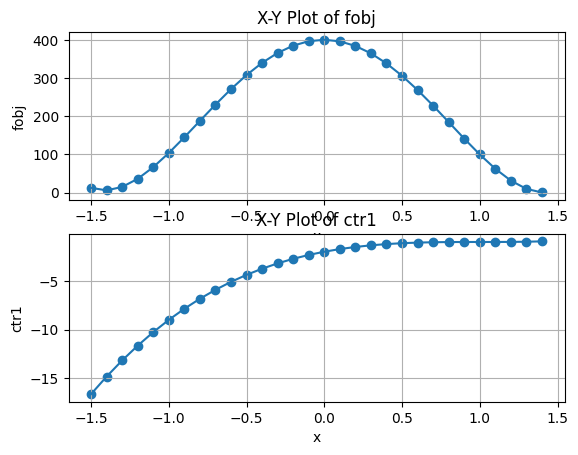

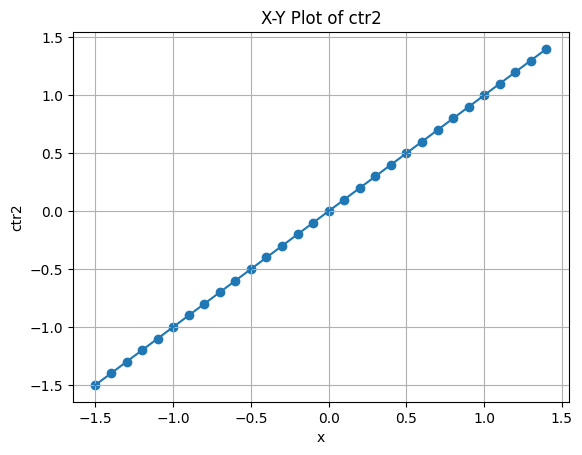

In [7]:
from noloadj.analyse.simulation import computeParametric
import numpy as np
# Compute Parametric
inputs = {'y': 2.0}
outputs = ['fobj', 'ctr1', 'ctr2']

variable = 'x'
values = np.arange(-1.5, 1.5, 0.1)  # [-1.5, -1.4, ..., 1.5]
iter = computeParametric(rosenbrock, variable, values, inputs, outputs)

df = iter.print()
print(df)
iter.plotXY()

In [8]:
from noloadj.analyse.simulation import computeJacobian
# Compute Gradients
inputs = {'x': 1.0, 'y': 2.0}
outputs = ['fobj', 'ctr1', 'ctr2']
dfobj,dctr1,dctr2 = computeJacobian(model=rosenbrock, inputs=inputs,
                                    outputs=outputs)
print('dfobj =', dfobj)
print('dctr1 =', dctr1)
print('dctr2 =', dctr2)

dfobj = [-400.0, 200.0]
dctr1 = [0.0, -1.0]
dctr2 = [1.0, 1.0]


<H3>Compute DGSM using NoLoad</H3>


In [ ]:
from noloadj.analyse.DGSM import computeDGSM
import jax.numpy as jnp

def Ishigami(x1,x2,x3,A,B):
    Y=jnp.sin(x1)+A*jnp.sin(x2)*jnp.sin(x2)+B*jnp.sin(x1)*(x3**4)
    return locals().items()

In [ ]:
inputs = {'x1': 0., 'x2': 0., 'x3': 0.}
deltas = {'x1': jnp.pi, 'x2': jnp.pi, 'x3': jnp.pi}
deltas_type = {'x1': 'abs', 'x2': 'abs', 'x3': 'abs'}
outputs = ['Y']
Param = {'A': 7., 'B': 0.1}
DGSM = computeDGSM(model=Ishigami, inputs=inputs, outputs=outputs,
                   deltas=deltas, deltas_type=deltas_type, N=1024,Param=Param)
print('DGSM=', DGSM)

<H3>Compute Sobol 1st-order indices</H3>

In [ ]:
from noloadj.analyse.Sobol import computeSobol

inputs = {'x1': 0., 'x2': 0., 'x3': 0.}
deltas = {'x1': jnp.pi, 'x2': jnp.pi, 'x3': jnp.pi}
deltas_type = {'x1': 'abs', 'x2': 'abs', 'x3': 'abs'}
outputs = ['Y']
Param = {'A': 7., 'B': 0.1}
Sobol = computeSobol(model=Ishigami, inputs=inputs, outputs=outputs,
                   deltas=deltas, deltas_type=deltas_type, N=1024,Param=Param)
print('Sobol=',Sobol)